In [1]:
# Omitir este código
# Rutinas para visualizar puntos y líneas
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import sympy as sp
import math

def angulo(ax,u,v,r,nombre='',fontsize=15):
    alpha_u=math.degrees(math.atan2(u[1],u[0]))
    alpha_v=math.degrees(math.atan2(v[1],v[0]))
    ax.add_patch(Arc((0,0),r,r,0,alpha_u,alpha_v))
    alpha=(alpha_u+alpha_v)/2
    x=r*math.cos(math.radians(alpha))/2
    y=r*math.sin(math.radians(alpha))/2
    if nombre!='':
        ax.text(x,y,nombre,fontsize=fontsize)


def ejes(x0,y0,x1,y1,k=1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    ax = plt.axes([0.,0.,k,k*1.34*(y1-y0)/(x1-x0)])
    ax.set_xlim(x0,x1)
    ax.set_ylim(y0,y1)
    punto2d(ax,(0,0),nombre=r'$\vec{0}$')
    return ax

def ejes3d(x0,x1,y0,y1,z0,z1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    return ax

def flecha2d(ax,v,sumar=[0,0],nombre='',fontsize=15,**kwargs):
    ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.2,head_length=0.2, length_includes_head=True,**kwargs)
    if nombre!='':
        ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)

from mpl_toolkits.mplot3d import Axes3D

def flecha3d(ax,A:sp.Matrix,B:sp.Matrix=None,nombres=None,fontsize=15,**kwargs):#problemas en 2D
    if B==None:
        B=sp.zeros(*A.shape)
    elif A.shape!=B.shape:
        raise ValueError('flechas(ax,A) o flechas(ax,A,B) y A y B son del mismo tamaño')

    if isinstance(nombres,str):
        if A.cols==1:
            nombres=[nombres]
        else:
            nombres=[nombres+str(i) for i in range(A.cols)]
    elif (isinstance(nombres,list)) and (len(nombres)!=A.cols):
        raise ValueError('flechas(ax,A) o flechas(ax,A,n) y n="v" o  len(n)!=A.cols')
    elif not isinstance(nombres,list) and nombres!=None:
        raise ValueError('n es str o list')
        
    if A.rows==2:
        #v=A.col(0)
        #sumar=B.col(0)
        #ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.02,head_length=0.02, length_includes_head=True,**kwargs)
        #if nombre!='':
        #    ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)
        ax.quiver(B.row(0),B.row(1),A.row(0),A.row(1),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],nombres[i],fontsize=fontsize)
        
    elif A.rows==3:
        #AT=A.T
        ax.quiver(B.row(0),B.row(1),B.row(2),A.row(0),A.row(1),A.row(2),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],A.row(2)[i]+B.row(2)[i],nombres[i],fontsize=fontsize)
    else:
        raise ValueError('Sólo imprime matrices de 2 o 3 renglones')


def linea2d(ax,u,v=(0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),color)
        
def punto2d(ax,v,nombre='',fontsize=15,color='k',**kwargs):
    ax.scatter(*v,s=20,color=color)
    if nombre!='':
        ax.text(v[0],v[1],nombre,fontsize=fontsize)        
        
def juntar(*columnas):# apilar para col_join
    A=columnas[0]
    for columna in columnas[1:]:
        A=A.row_join(columna)
    return A

def p(v):
    return '('+', '.join([str(ai) for ai in v])+')\u209c'

# Vectores vs Matrices
En este curso un vector se visualizará como una columna de una matriz. Aunque para la mayoría de las aplicaciones se puede ver como una matriz de una columna. Para el primer caso se representará el vector con paréntesis, en el segundo se usarán los corchetes. Como <u>esta diferencia no es importante para la mayoría de los temas</u>, sólo se hará énfasis en diferenciar estas notaciones cuando sea necesario.

# Combinación lineal y espacio generado
Recordemos que si  

$A=[\matrix{\vec{v}_1 & \vec{v}_2 & \cdots &  \vec{v}_n}]=\left[\matrix{
c_{11} & c_{12} & \cdots & c_{1n}  \\
c_{21} & c_{22} & \cdots & c_{2n} \\ 
\vdots &  \vdots &  \ddots & \vdots
\\
c_{m1} & c_{m2} & \cdots & c_{mn} }
\right]$ 

y 

$\vec{t}=\left( \matrix{t_1 \\ t_2 \\ \vdots \\ t_n } \right)$ 


entonces la multiplicación de matriz por vector se puede escribir como una **combinación lineal**.

$\begin{align}
A \vec{t} &= t_1\vec{v}_1 + t_2\vec{v}_2 + \cdots +  t_n\vec{v}_n\\
\left[\matrix{
c_{11} & c_{12} & \cdots & c_{1n}  \\
c_{21} & c_{22} & \cdots & c_{2n} \\ 
\vdots &  \vdots &  \ddots & \vdots
\\
c_{m1} & c_{m2} & \cdots & c_{mn} }
\right]
\left( \matrix{t_1\\t_2\\ \vdots \\t_n} \right)
&=t_1\left( \matrix{c_{11}\\c_{21}\\ \vdots \\c_{m1}} \right) 
+ t_2\left( \matrix{c_{12}\\c_{22}\\ \vdots \\c_{m2}} \right) 
+ \cdots
+ t_n\left( \matrix{c_{1n}\\c_{2n}\\ \vdots \\c_{mn}} \right) 
\end{align}$

Esta notación en muy importante cunado se quiere enfatizar en las columnas de la matriz. Recuerde que  se ha usado cuando se escribe la  solución general de un sistema homogéneo.

El **espacio generado de un conjunto de vectores** $S=\{\vec{v}_1, \vec{v}_2, \ldots,   \vec{v}_n\}$ es el espacio columna de la matriz $A=[\matrix{\vec{v}_1 & \vec{v}_2 & \cdots &  \vec{v}_n}]$.

$\begin{align}
\text{Co}(A)=\text{Gen}(\{\vec{v}_1, \vec{v}_2, \ldots,   \vec{v}_n\})&=\{ t_1\vec{v}_1 + t_2\vec{v}_2 + \cdots +   t_n\vec{v}_n \mid  t_1, t_2, \ldots, t_n \in \mathbb{R} \}\\
\text{Gen}
\left\{ \left( \matrix{c_{11}\\c_{21}\\ \vdots \\c_{m1}} \right), 
\left( \matrix{c_{12}\\c_{22}\\ \vdots \\c_{m2}} \right), 
 \ldots ,
\left( \matrix{c_{1n}\\c_{2n}\\ \vdots \\c_{mn}} \right)
 \right\}&=
\left\{ t_1\left( \matrix{c_{11}\\c_{21}\\ \vdots \\c_{m1}} \right) 
+ t_2\left( \matrix{c_{12}\\c_{22}\\ \vdots \\c_{m2}} \right) 
+ \cdots
+ t_n\left( \matrix{c_{1n}\\c_{2n}\\ \vdots \\c_{mn}} \right)
 \mid  t_1, t_2, \ldots, t_n \in \mathbb{R} \right\}
 \end{align}
 $

Por simplicidad $\text{Gen}(\{\vec{v}_1, \vec{v}_2, \ldots,   \vec{v}_n\})$ se denotará $\text{Gen}\{\vec{v}_1, \vec{v}_2, \ldots,   \vec{v}_n\}$.

A continuación, se visualizarán algunos vectores y sus espacios generados.


# Teorema de reducción del conjunto generador [ Nakos,  2.9, pg 92]

Si uno de los vectores $\vec{v}_1, \vec{v}_2, \ldots \vec{v}_k$ es combinación lineal de los demás, el espacio generado permanece igual si se elimina ese vector.

### Demostración. 
Para comodidad en la notación podremos suponer

$\vec{v}_1 = c_2 \vec{v}_2 + c_3 \vec{v}_3 + \cdots + c_{k}\vec{v}_{k} \ \ \ $  con $\ \ \ c_2, \ldots , c_{k-1}  \in \mathbb{R}$

Hay que probar que 

$\text{Gen}\{\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}=\text{Gen}\{\vec{v}_1,\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\} $

Para probar la igualdad de dos conjuntos hay que probar las dos contenencias.

$\text{Gen}\{\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\} \subseteq \text{Gen}\{\vec{v}_1,\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\} $

$ 
\text{Gen}\{\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\} \supseteq \text{Gen}\{\vec{v}_1,\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}$


La primera contenencia es evidente ya que si $\vec{u} \in \text{Gen}\{\vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}$ entonces 

$\begin{align}
\vec{u}&=a_2 \vec{v}_2 + a_3 \vec{v}_3 + \cdots + a_{k}\vec{v}_{k}\\
&=0 \vec{v}_1 + a_2 \vec{v}_2 + a_3 \vec{v}_3 + \cdots + a_{k}\vec{v}_{k}\\
\end{align}$

y por lo tanto $\vec{u} \in \text{Gen}\{\vec{v}_1, \vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}$

La segunda contenencia es un poco más interesante. Si $\vec{u} \in \text{Gen}\{\vec{v}_1, \vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}$  y $v_1 = c_2 \vec{v}_2 + c_3 \vec{v}_3 + \cdots + c_{k}\vec{v}_{k} \ \ \ $ entonces 

$\begin{align}
\vec{u}&=a_1 \vec{v}_1 + a_2 \vec{v}_2 + a_3 \vec{v}_3 + \cdots + a_{k}\vec{v}_{k}\\
&=a_1( c_2 \vec{v}_2 + c_3 \vec{v}_3 + \cdots + c_{k}\vec{v}_{k} ) + a_2 \vec{v}_2 + a_3 \vec{v}_3 + \cdots + a_{k}\vec{v}_{k}\\
&=(a_1c_2+a_2) \vec{v}_2 + (a_1c_3+a_3) \vec{v}_3 + \cdots + (a_1c_k+a_k)\vec{v}_{k}\\
\end{align}$

y por lo tanto $\vec{u} \in \text{Gen}\{ \vec{v}_2, \vec{v}_3, \ldots, \vec{v}_{k}\}$

## Corolario
Las columnas de una matriz generan el mismo espacio si se suprimen las columnas sin l-pivote (lugar del pivote en una matriz escalón equivalente).

### Ilustración
Basta con probar que una columna sin l-pivote se puede escribir como una combinación lineal de las columnas que están a la izquierda. A continuación, se ilustrará con un ejemplo, el cual permite entender el fundamento de la demostración.

$\left[\matrix{1&2&3&5\\2&2&4&6\\3&2&5&7}\right] \sim \left[\matrix{1&2&3&5\\0&-2&-2&-4\\0&-4&-4&-8}\right] \sim \left[\matrix{1&2&3&5\\0&-2&-2&-4\\0 & 0 & 0 & 0}\right]$

Observe que la tercera columna no tiene pivote. Ahora vamos a considerar la siguiente matriz extendida, en donde la tercera columna es precisamente los términos constantes. Para encontrar la forma escalón se hacen exactamente las mismas operaciones elementales.

$\left[\matrix{1&2&:&3\\2&2&:&4\\3&2&:&5}\right] \sim \left[\matrix{1&2&:&3\\0&-2&:&-2\\0&-4&:&-4}\right] \sim \left[\matrix{1&2&:&3\\0&-2&:&-2\\0 & 0 &:& 0 }\right]$

El sistema es consistente ya que en la tercera columna no hay un elemento delantero (pivote). Al despejar el anterior sistema de ecuaciones se obtiene que 

$1\left(\matrix{1\\2\\3}\right)+1\left(\matrix{2\\2\\2}\right)=\left(\matrix{3\\4\\5}\right)$


De esta forma se puede comprender por qué motivo las columnas que no tienen l-pivote se pueden escribir como combinación lineal de las columnas con l-pivote que están a la izquierda. Y debido al teorema de reducción del conjunto generador, se pueden suprimir las columnas sin l-pivote y esto no altera el conjunto generado. 

$\text{Co}\left(\left[\matrix{1&2&3&5\\2&2&4&6\\3&2&5&7}\right]\right)=\text{Co}\left(\left[\matrix{1&2\\2&2\\3&2}\right]\right)$

# Visualización de vectores y subespacios

Ya que un vector $\left(\matrix{x_0 \\ x_1 }\right)$ en $\mathbb{R}^2$ o un vector  $\left(\matrix{x_0 \\ x_1 \\ x_2}\right)$ en $\mathbb{R}^3$ se pueden graficar, se usará una flecha o un punto para representarlos. Sin embargo, en esta sección preferiré usar el punto.

A continuación se usarán las anteriores rutinas sobre Matplotlib para dibujar el vector $\vec{u}=\left(\matrix{ 4 \\ 3 }\right)$ en $\mathbb{R}^2$ 

In [2]:
u0=sp.Matrix([4,3])
print('v='+p(u0))

v=(4, 3)ₜ


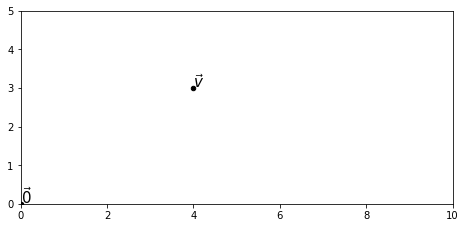

In [3]:
ax=ejes(0,0,10,5)
punto2d(ax,u0,nombre=r'$\vec{v}$')
plt.show()

# Subespacios de $\mathbb{R}^2$


## Visualización de suma de vectores en $\mathbb{R}^2$


In [4]:
u1=sp.Matrix([3,5])
v1=sp.Matrix([5,1])
print('w='+p(u1)+'+'+p(v1)+'='+p(u1+v1))

w=(3, 5)ₜ+(5, 1)ₜ=(8, 6)ₜ


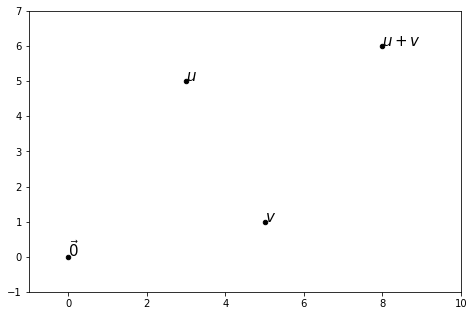

In [5]:
ax=ejes(-1,-1,10,7)
punto2d(ax,u1,nombre='$u$') 
punto2d(ax,v1,nombre='$v$') 
punto2d(ax,u1+v1,nombre='$u+v$') 
plt.show()

El origen de coordenadas, los dos sumandos y el resultado; forman los vértices de un paralelogramo. Por esto, la suma de vectores se conoce como la ley del paralelogramo.

## Visualización de escalar por vector en $\mathbb{R}^2$

Al multiplicar un vector por una constante, cada componente se multiplica por la misma constante y por lo tanto el vector se desplaza en línea recta respecto al origen. 

In [6]:
u2=sp.Matrix([4,3])
print('v=2'+p(u2)+'='+p(2*u2))

v=2(4, 3)ₜ=(8, 6)ₜ


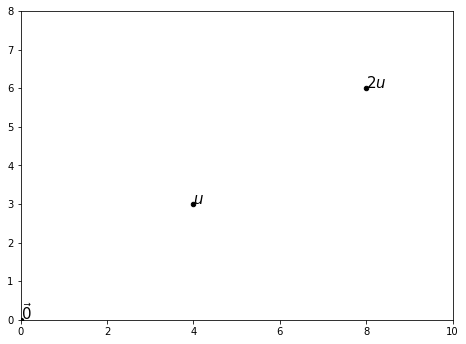

In [7]:
ax=ejes(0,0,10,8)
punto2d(ax,u2,nombre='$u$') 
punto2d(ax,2*u2,nombre='$2u$') 
plt.show()

In [8]:
print('1/2'+p(u2)+'='+p(u2/2))
print('3/2'+p(u2)+'='+p(u2*3/2))

1/2(4, 3)ₜ=(2, 3/2)ₜ
3/2(4, 3)ₜ=(6, 9/2)ₜ


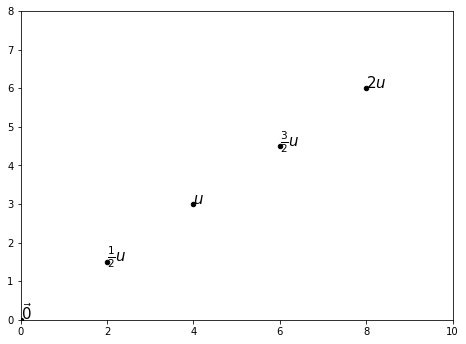

In [9]:
ax=ejes(0,0,10,8)
punto2d(ax,u2,nombre='$u$') 
punto2d(ax,2*u2,nombre='$2u$') 
punto2d(ax,u2/2,nombre=r'$\frac{1}{2}u$') 
punto2d(ax,u2*3/2,nombre=r'$\frac{3}{2}u$') 
plt.show()

Se podría interpretar que el vector $u$ es una unidad de medida, el cual genera una nueva escala.

## Espacio generado por un vector en $\mathbb{R}^2$

Recordemos que el espacio generado por un vector $\vec{u}$ es

$\text{Gen}(\vec{u})=\{t_0 \vec{u} \mid t_0 \in \mathbb{R} \}$ 

Como los múltiplos de $\vec{u}$ están en una recta que pasa por $\vec{u}$ y por $\vec{0}$. Entonces el espacio generado por un vector $\vec{u}$ es la recta que pasa por  $\vec{u}$ y por $\vec{0}$.

Si $\vec{u}=\left(\matrix{4\\3}\right)$ entonces el espacio generado es la recta que pasa por los vectores  $\left(\matrix{0\\0}\right)$ y $\left(\matrix{4\\3}\right)$.

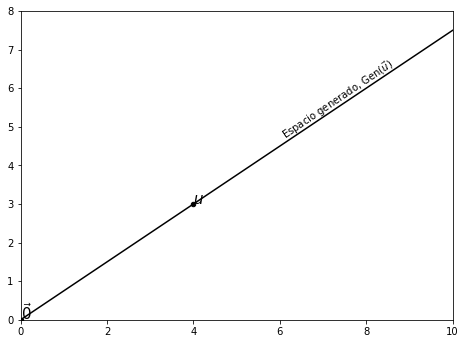

In [10]:
u2=sp.Matrix([4,3])
ax=ejes(0,0,10,8)
punto2d(ax,u2,nombre='$u$') 
linea2d(ax,u2*5/2,nombre='$u$')  
ax.text(6,4.7,r'Espacio generado, Gen($\vec{u}$)',rotation=34)

plt.show()

<!--Observemos que, como el vector $\left(\matrix{1\\1}\right)$ no está en el espacio generado $\text{Gen}\left\{\left(\matrix{1\\1}\right)\right\}$, entonces no hay solucion para la siguiente ecuación vectorial.

$t_0\left(\matrix{4\\3}\right)=\left(\matrix{1\\1}\right)$

La cual, al ser planteada como un sistema de ecuaciones se obtiene un a ecuación inconsistente

$\begin{align}
4t_0&=1\\
3t_0&=1
$\end{align}-->

## Espacio generado por dos vectores en $\mathbb{R}^2$

### Caso 1, cuando hay dos l-pivotes, (rango 2)

Para entender este caso, se ilustrará con los vectores  $\vec{u}_0=\left(\matrix{ 1 \\ 2 }\right)$  y $\vec{u}_1=\left(\matrix{ 4 \\ 3 }\right)$ .

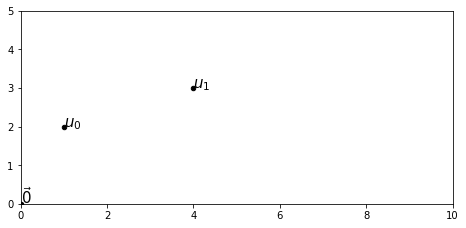

In [11]:
u2_0=sp.Matrix([1,2])
u2_1=sp.Matrix([4,3])

ax=ejes(0,0,10,5)
punto2d(ax,u2_0,nombre='$u_0$') 
punto2d(ax,u2_1,nombre='$u_1$') 
plt.show()

$\begin{align}
\text{Gen}\{\vec{u}_0,\vec{u}_1\}&=\left\{ t_0 \left(\matrix{ 1 \\ 2 }\right) + t_1 \left(\matrix{ 4 \\ 3 }\right) \mid t_0, t_1 \in \mathbb{R} \right\}\\
&=\left\{ \left[\matrix{ 1 & 4 \\ 2 & 3 }\right]\left(\matrix{ t_0 \\ t_1 }\right)  \mid \left(\matrix{ t_0 \\ t_1 }\right) \in \mathbb{R}^2 \right\}
\end{align}$

Esta vez, en vez de mirar directamente el conjunto generado, se averiguará cual vector no está en el conjunto generado. Es decir, se mirará para que vector $\vec{b}=\left(\matrix{ b_0 \\ b_1 }\right)$ el siguiente sistema es inconsistente. 

$t_0 \left(\matrix{ 1 \\ 2 }\right) + t_1 \left(\matrix{ 4 \\ 3 }\right)=\left(\matrix{ b_0 \\ b_1 }\right)$

$\left[\matrix{
1 & 4 & : & b_0 \\
2 & 3 & : & b_1 \\
}\right] \sim
\left[\matrix{
\underline{1} & 4 & : & b_0 \\
0 & \underline{-5} & : & b_1 - 2b_0 \\
}\right]
$

Resulta que como <u>cada renglón de la matriz de coeficientes tiene un pivote</u>, entonces no hay posibilidad que en los términos constantes haya un pivote. Por lo tanto, este sistema de ecuaciones es <u>consistente para todos los vectores de términos constantes</u>. Lo cual significa que cualquier vector $\vec{b} \in \mathbb{R}^2$ está en el conjunto generado por $\vec{u}_0$ y $\vec{u}_1$. Luego, $\vec{u}_0$ y $\vec{u}_1$ <u>generan todo el espacio</u>.

$\text{Gen}\{\vec{u}_0,\vec{u}_1\}=\mathbb{R}^2$

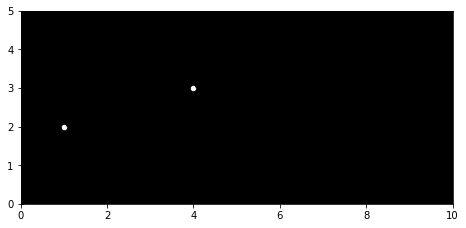

In [12]:
u2_0=sp.Matrix([1,2])
u2_1=sp.Matrix([4,3])

ax=ejes(0,0,10,5)
punto2d(ax,u2_0,nombre='$u_0$',color='w') 
punto2d(ax,u2_1,nombre='$u_1$',color='w') 
ax.set_facecolor('black')
plt.show()

### Caso 2, Cuando hay un l-pivote, (rango 1)
Sean $\vec{u}_0=\left(\matrix{ 4 \\ 2 }\right)$  y $\vec{u}_1=\left(\matrix{ 2 \\ 1 }\right)$


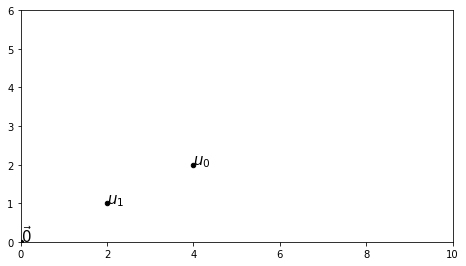

In [13]:
u2_0=sp.Matrix([4,2])
u2_1=sp.Matrix([2,1])

ax=ejes(0,0,10,6)
punto2d(ax,u2_0,nombre='$u_0$') 
punto2d(ax,u2_1,nombre='$u_1$')
plt.show()

$\begin{align}
\text{Gen}\{\vec{u}_0,\vec{u}_1\}&=\left\{ t_0 \left(\matrix{ 4 \\ 2 }\right) + t_1 \left(\matrix{ 2 \\ 1 }\right) \mid t_0, t_1 \in \mathbb{R} \right\}\\
&=\left\{ \left[\matrix{ 4 & 2 \\ 2 & 1 }\right]\left(\matrix{ t_0 \\ t_1 }\right)  \mid \left(\matrix{ t_0 \\ t_1 }\right) \in \mathbb{R}^2 \right\}
\end{align}$

Nuevamente se averiguará cual vector no está en el conjunto generado. Es decir, se mirará para que vector $\vec{b}=\left(\matrix{ b_0 \\ b_1 }\right)$ el siguiete sistema es inconsistente. 

$t_0 \left(\matrix{ 4 \\ 2 }\right) + t_1 \left(\matrix{ 2 \\ 1 }\right)=\left(\matrix{ b_0 \\ b_1 }\right)$

$\left[\matrix{
4 & 2 & : & b_0 \\
2 & 1 & : & b_1 \\
}\right] \sim
\left[\matrix{
\underline{4} & 2 & : & b_0 \\
0 & 0& : & b_1 - \frac{1}{2}b_0
}\right]
$

En este caso los vectores no generan todo el espacio, ya que el último renglón de los términos constantes puede producir inconsistencias cuando $b_1 - b_0/2 \neq 0$.

Pero debido a que hay columnas que no tienen l-pivote podemos utilizar el Teorema de reducción del conjunto generador [ Nakos, 2.9, pg 92].  Esto nos permite eliminar el segundo vector y concluir lo siguiente.

$\text{Gen}\left\{ \left(\matrix{ 4 \\ 2 }\right),  \left(\matrix{ 2 \\ 1 }\right)  \right\}=
\text{Gen}\left\{ \left(\matrix{ 4 \\ 2 }\right)  \right\}$

Debido a uno de los ejercicios anteriores, podemos saber que el espacio generado por el vector $\left(\matrix{ 4 \\ 2 }\right)$ es una recta que pasa por $\left(\matrix{ 0 \\ 0 }\right)$ y $\left(\matrix{ 4 \\ 2 }\right)$.

Por lo tanto, el espacio generado por los vectores  $\left(\matrix{ 4 \\ 2 }\right)$  $\left(\matrix{ 2 \\ 1 }\right)$ es una recta que pasa por $\left(\matrix{ 0 \\ 0 }\right)$ y $\left(\matrix{ 4 \\ 2 }\right)$.


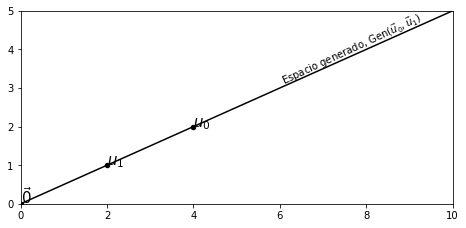

In [14]:
u2_0=sp.Matrix([4,2])
u2_1=sp.Matrix([2,1])

ax=ejes(0,0,10,5)
punto2d(ax,u2_0,nombre='$u_0$') 
punto2d(ax,u2_1,nombre='$u_1$') 
linea2d(ax,u2_0*5,nombre='$u$')  
ax.text(6,3.1,r'Espacio generado, Gen($\vec{u}_0,\vec{u}_1$)',rotation=25)
plt.show()

# Espacio generado por más de dos vectores en $\mathbb{R}^2$

Con $n$ vectores de $\mathbb{R}^2$ podemos construir una matriz de $2 \times n$. Esto implica que no pueden haber más de 2 l-pivotes en esa matriz. 

* Si hay 2 l-pivotes entonces los vectores generan todo $\mathbb{R}^2$. 
* Pero si sólo hay un l-pivote entonces todos los vectores estarán sobre la misma recta que pasa por el origen y precisamente esa recta será el espacio generado por los $n$ vectores.


# Espacio nulo correspondiente a una ecuación con dos variables. 

El espacio nulo de la matriz

$A=[\matrix{3 & 2}]$ 

corresponde a la solución de la ecuación homogénea 

$3x_0 + 2x_1=0$ 

Para encontrar el conjunto solución usaremos el procedimiento presentado en clase.

* Escribir la matriz extendida

$[\matrix{3 & 2 & : & 0}]$

* Encontrar la forma escalón

Ya está en forma escalón

* Asignar parámetros a las variables libres

$x_1=t_0$

* Despejar las variables delanteras en término de parámetros

$x_0=\frac{-2}{3}t_0$

* Escribir vectorialmente la solución general

$\left(\matrix{ x_0 \\ x_1 }\right)=t_0\left(\matrix{ \frac{-2}{3} \\ 1}\right)$

Como el espacio es generado por un sólo vector de  $\mathbb{R}^2$, entonces corresponde a una recta que pasa por $\left(\matrix{ 0 \\ 0}\right)$ y por $\left(\matrix{ \frac{-2}{3} \\ 1}\right)$

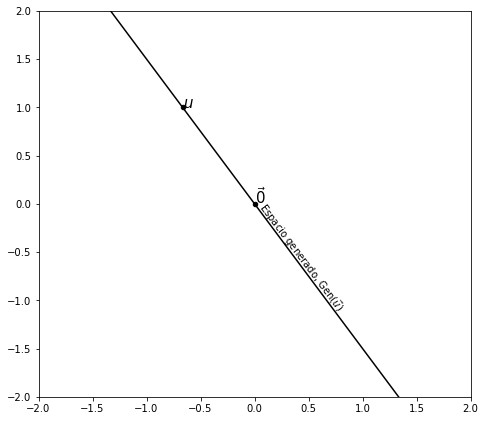

In [15]:
u5=sp.Matrix([-2/3,1])

ax=ejes(-2,-2,2,2)
punto2d(ax,u5,nombre='$u$') 
linea2d(ax,2*u5,-2*u5,nombre='$u$')  
ax.text(0,-1.1,r'Espacio generado, Gen($\vec{u}$)',rotation=-53)
plt.show()

## Espacio nulo correspondiente a dos ecuaciones con dos variables

### Caso 1, cuando todas las columnas de la matriz de coeficientes tienen  l-pivotes


El espacio nulo de la matriz

$A=\left[\matrix{1 & 2\\3 & 4}\right]$ 

corresponde a la solución de las ecuaciones homogéneas 

$\begin{align}
1x_0 + 2x_1=0\\
3x_0 + 4x_1=0\\
\end{align}$ 

Para encontrar el conjunto solución usaremos el procedimiento presentado en clase.

* Escribir la matriz extendida

$\left[\matrix{1 & 2 & : & 0\\3 & 4 & : & 0}\right]$

* Encontrar la forma escalón

$\left[\matrix{1 & 2 & : & 0\\0 & -2 & : & 0}\right]$

* Asignar parámetros a las variables libres

No hay variables libres, por lo tanto, el sistema tiene solución única.

* Despejar las variables delanteras en término de parámetros

$\begin{align}
x_0&=0\\
x_1&=0
\end{align}$

* Escribir vectorialmente la solución general

$\left(\matrix{ x_0 \\ x_1 }\right)=\left(\matrix{ 0 \\ 0}\right)$

El espacio es generado corresponde únicamente al origen de coordenadas.

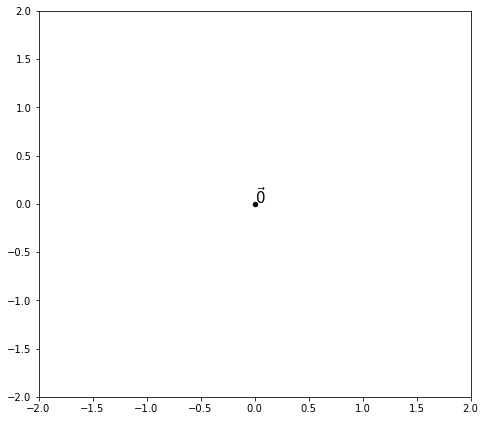

In [16]:
ax=ejes(-2,-2,2,2)
plt.show()

### Caso 2, cuando hay una columna de la matriz de coeficientes sin  l-pivotes

El espacio nulo de la matriz

$A=\left[\matrix{1 & 2\\2 & 4}\right]$ 

corresponde a la solución de las ecuaciones homogéneas 

$\begin{align}
1x_0 + 2x_1=0\\
2x_0 + 4x_1=0\\
\end{align}$ 

Para encontrar el conjunto solución usaremos el procedimiento presentado en clase.

* Escribir la matriz extendida

$\left[\matrix{1 & 2 & : & 0\\2 & 4 & : & 0}\right]$

* Encontrar la forma escalón

$\left[\matrix{1 & 2 & : & 0\\0 & 0 & : & 0}\right]$

* Asignar parámetros a las variables libres

$x_1=t_0$

* Despejar las variables delanteras en término de parámetros

$x_0=-2t_0$

* Escribir vectorialmente la solución general

$\left(\matrix{ x_0 \\ x_1 }\right)=t_0\left(\matrix{ -2 \\ 1}\right)$


Cuando hay una columna en la matriz de coeficientes sin l-pivote, se obtiene un parámetro y por lo tanto el espacio generado corresponde a una recta. En este caso pasa por $\left(\matrix{ 0 \\ 0}\right)$ y $\left(\matrix{ -2 \\ 1}\right)$


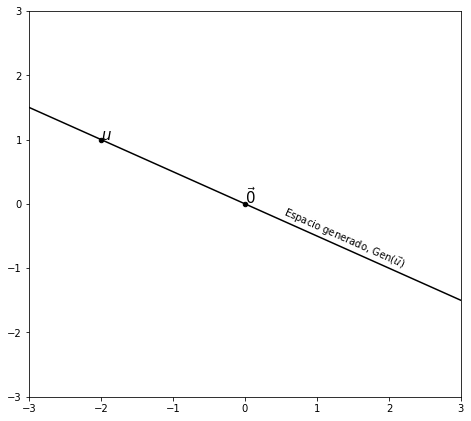

In [17]:
u6=sp.Matrix([-2,1])

ax=ejes(-3,-3,3,3)
punto2d(ax,u6,nombre='$u$') 
linea2d(ax,2*u6,-2*u6,nombre='$u$')  
ax.text(0.5,-1,r'Espacio generado, Gen($\vec{u}$)',rotation=-24)
plt.show()

## Espacio nulo correspondiente a más de dos ecuaciones con dos variables

En este caso no pueden haber más de dos variables libres. 
* Si no hay variables libres, la solución del sistema homogéneo es única. Sería el origen.
* Si hay una variable libre, habrá un parámetro que generará una recta que pasa por el origen.
 

# Espacio Nulo 

## Definiciones

El **espacio nulo de la matriz** $A$ o **el conjunto solución del sistema homogéneo** $[A:\vec{0}]$ es el conjunto de todos los vectores $\vec{x}$ que pueden solucionar el sistema de ecuaciones homogéneo $A\vec{x}=\vec{0}$. 

$\text{Nu}(A) = \{\vec{x} \mid  A\vec{x}=\vec{0}\}$

La **nulidad** de $A$ (denotado $\nu(A)$ y se pronuncia nu de A) es el número de columnas de $A$ sin l-pivotes (lugares de pivotes de matriz escalón equivalente).

Se dice que las <u>columnas</u> de la matriz $A$ son **Linealmente Independientes** (LI) si $\nu(A)=0$. De lo contrario se dice las <u>columnas</u> de la matriz $A$ son **Linealmente Dependientes** (LD).

De forma abreviada se puede decir que $A$ es LI si sus columnas son LI

## Teorema

$A$ es <u>Linealmente Independientes</u> 
* **si y sólo si** $\nu(A)=0$
* **si y sólo si** el sistema homogéneo $[A:\vec{0}]$ no tiene columnas sin l-pivotes
* **si y sólo si** el sistema homogéneo $[A:\vec{0}]$ no tiene variables libres
* **si y sólo si** el sistema homogéneo $[A:\vec{0}]$ no tiene parámetros
* **si y sólo si** el sistema homogéneo $[A:\vec{0}]$ tiene <u>solución única</u>.


# Espacio Generado

## Definiciones

El **espacio columna de la matriz $C$** o **espacio generado por las columnas de $C$**  es el conjunto de todos los vectores $\vec{x}$ que se pueden obtener de la ecuación $C\vec{t}=\vec{x}$, al darle todos los posibles valores al vector $\vec{t}$. 

$\text{Co}(C) = \text{Gen}(C) = \{C\vec{t}=\vec{x} \mid  \vec{t}= \mathbb{R}^k \}$

El **rango** de $C$ (denotado $\rho(C)$ y se pronuncia ro de C) es el número de columnas de $C$ con l-pivotes (lugares de pivotes de una matriz escalón equivalente).

Se dice que las <u>columnas</u> de la matriz $C$  **generan todo el espacio** si $\rho(C)$ igual al número de <u>renglones</u> de $C$.

## Teorema

Las <u>columnas</u> de la matriz $C$  generan todo el espacio
* **si y sólo si** $\rho(C)$ es igual al número de <u>renglones</u> de $C$.
* **si y sólo si** hay un l-pivote en cada renglón de $C$.
* **si y sólo si** para todo $\vec{x} \in \mathbb{R}^n$, el sistema $[C:\vec{x}]$ no tiene l-pivote en la columna de términos constantes.
* **si y sólo si** el sistema $[C:\vec{x}]$ es consistente para todo $x \in \mathbb{R}^n$ 
* **si y sólo si** para cada valor de $\vec{x}$ existe al menos un  vector $\vec{t}$ tal que $C\vec{t}\vec{x}$

# Bases de los subespacios de $\mathbb{R}^m$ 

Un subconjunto de $\mathbb{R}^m$ es un **subespacio de $\mathbb{R}^m$** si se puede escribir como el espacio columna de una matriz $C$.  En particular, el origen es el espacio columna de la matriz cero.

El conjunto de columnas de $C$ con l-pivote se llama una **base del subespacio**. En particular, el conjunto vacío es la base del origen.

La **dimensión del subespacio** es el número de l-pivotes de $C$. La dimensión del origen es el escalar cero.

## Teorema
Un conjunto de vectores $S=\{ v_1, v_2, \ldots , v_n \}$ es una base de un subespacio $V$ de $\mathbb{R}^m$ **si y sólo si** $S$ es LI y $Gen(S)=V$.
 




# Subespacios de $\mathbb{R}^2$



| Dimensión | Geométricamente | 
|  -        |        -        |
|   0       | Es el origen       |
|1 |         Es una recta que pasa por el origen y por ...|
|2 |  Es todo $\mathbb{R}^2$ | 


La dimensión de $Nu(A)$ (el espacio nulo de $A$) es $\nu(A)$ (la nulidad de $A$). Recordemos que <u>una base de $Nu(A)$ consiste en el conjunto de soluciones particulares básicas del sistema homogéneo $[A:0]$</u>.

La dimensión de $Co(C)$ (el espacio columna de $C$) es $\rho(C)$ (el rango de $C$). Recordemos que <u>una base de $Co(C)$ se obtiene al quitar las columnas que no tienen l-pivote</u>.




# Ejemplo 1

El objetivo de este ejercicio es conocer un poco mejor el subespacio
$\text{Co}\left(\left[\matrix{1 & 2 & 3 \\ 4 & 5 & 7}\right]\right)$. Para esto hay que ubicar los l-pivotes. Es decir, hay que encontrar su forma escalón.

In [18]:
M=sp.Matrix([[1, 2, 3],[4, 5, 7]])
M

Matrix([
[1, 2, 3],
[4, 5, 7]])

In [19]:
M[1,:] += -4*M[0,:]
M

Matrix([
[1,  2,  3],
[0, -3, -5]])

Como hay un l-pivote en cada renglón, se genera todo el espacio $\mathbb{R}^2$. Una base de $\mathbb{R}^2$ son las columnas con l-pivote de la <u>matriz original</u>. NO DE LA MATRIZ ESCALÓN.

In [20]:
base_ejemplo_1 = sp.Matrix([[1, 2],[4, 5]]) 
base_ejemplo_1

Matrix([
[1, 2],
[4, 5]])

In [21]:
dimension_ejemplo_1 = 2 
dimension_ejemplo_1

2

In [22]:
geometricamente_ejempolo_1 = 'Es todo el espacio'
geometricamente_ejempolo_1

'Es todo el espacio'

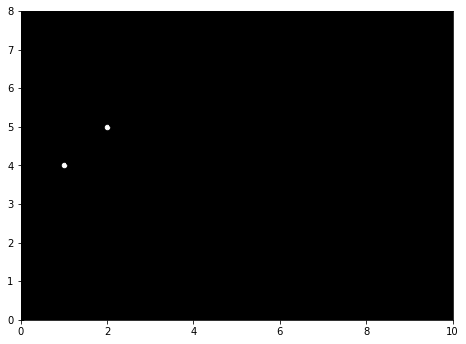

In [23]:
#gráfica del ejemplo 1
u2_0=sp.Matrix([1,4])

u2_1=sp.Matrix([2,5])

ax=ejes(0,0,10,8)
punto2d(ax,u2_0,nombre='$u_0$',color='w') 
punto2d(ax,u2_1,nombre='$u_1$',color='w') 
ax.set_facecolor('black')
plt.show()

# Ejemplo 2

El objetivo de este ejercicio es conocer un poco mejor el subespacio
$\text{Nu}\left(\left[\matrix{1 & 2\\3 & 4\\5 & 7}\right]\right)$

Para hallar el espacio nulo, lo primero es encontrar  el conjunto solución del sistema homogéneo $\left[\matrix{1 & 2 & : & 0\\3 & 4 & : & 0\\5 & 7 & : & 0}\right]$.



In [24]:
import sympy as sp
M=sp.Matrix([[1, 2,  0],[ 3, 4, 0],[5, 7, 0]])
M

Matrix([
[1, 2, 0],
[3, 4, 0],
[5, 7, 0]])

In [25]:
M[1,:]+=-3*M[0,:]
M[2,:]+=-5*M[0,:]
M

Matrix([
[1,  2, 0],
[0, -2, 0],
[0, -3, 0]])

In [26]:
M[2,:]+=-M[1,:]*3/2
M[0,:]+=M[1,:]
M

Matrix([
[1,  0, 0],
[0, -2, 0],
[0,  0, 0]])

Como no hay variables libres, no hay parámetros y por lo tanto la solución es única.

$\begin{align}
1x_0 + 0x_1 &= 0\\
0x_0 + 1x_1 &= 0
\end{align}$

Despejando queda 

$\left(\matrix{x_0\\x_1}\right)=\left(\matrix{0\\0}\right)$

Entonces el espacio nulo de $\left\{\left[\matrix{1 & 2 & 3 \\ 4 & 5 & 7}\right]\right\}$ es

$\left\{\left(\matrix{0\\0}\right)\right\}$, como este espacio no tiene parámetros entonces su base es el conjunto vacío.

In [27]:
base_ejemplo_2 = sp.Matrix() # Usaremos esto para representar cuando la base es un conjunto vacío
base_ejemplo_2

Matrix(0, 0, [])

In [28]:
dimension_ejemplo_2 = 0 
dimension_ejemplo_2

0

In [29]:
geometricamente_ejempolo_2 = 'Es el origen'

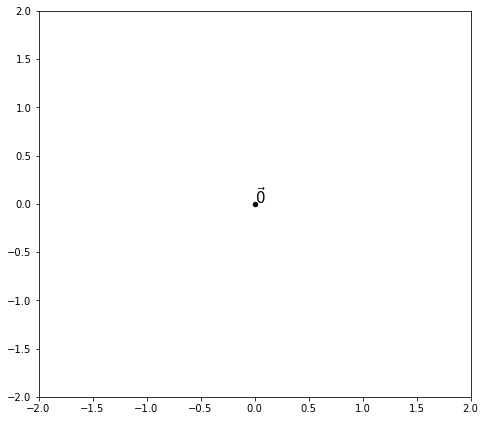

In [30]:
#gráfica del ejemplo 2
ax=ejes(-2,-2,2,2)
plt.show()

In [31]:
nombre = '   escribir aquí   '
codigo = 0

# Ejercicio:

Para cada uno de los siguientes subespacios:
1. $\text{Nu}\left(\left[\matrix{a+1 & a+b+2\\
a+b+2 & a+1}\right]\right)$
1. $\text{Co}\left(\left[\matrix{a+1 & a+b+2\\
a+b+2 & a+1}\right]\right)$
1. $\text{Nu}\left(\left[\matrix{3a+3 & 2a+2\\
3a & 2a\\3a+3b+3 & 2a+2b+2}\right]\right)$
1. $\text{Co}\left(\left[\matrix{b+1 & 2b+2 & 3b+3\\
a+b+2 & 2a + 2b+4 & 3a+3b +6}\right]\right)$

Encuentre:
* Una base.
* Su dimensión.
* Una descripción geométrica 
* La gráfica

Agregue las celdas necesarias para realizar el procedimiento correspondiente. No altere los nombres de las variables de las respuestas ya que serán necesarias para la calificación automática.

In [32]:
base_ejercicio_1= sp.Matrix() 
base_ejercicio_1

Matrix(0, 0, [])

In [33]:
dimension_ejercicio_1 = 0 
dimension_ejercicio_1

0

In [34]:
geometricamente_ejercicio_1 = ' escribir aquí '

In [35]:
# gráfica del ejercicio 1

In [36]:
base_ejercicio_2 = sp.Matrix() 
base_ejercicio_2

Matrix(0, 0, [])

In [37]:
dimension_ejercicio_2 = 0 
dimension_ejercicio_2

0

In [38]:
geometricamente_ejercicio_2 = ' escribir aquí '

In [39]:
# gráfica del ejercicio 2

In [40]:
base_ejercicio_3 = sp.Matrix() 
base_ejercicio_3

Matrix(0, 0, [])

In [41]:
dimension_ejercicio_3 = 0 
dimension_ejercicio_3

0

In [42]:
geometricamente_ejercicio_3 = ' escribir aquí '

In [43]:
# gráfica del ejercicio 3

In [44]:
base_ejercicio_4 = sp.Matrix() 
base_ejercicio_4

Matrix(0, 0, [])

In [45]:
dimension_ejercicio_4 = 0 
dimension_ejercicio_4

0

In [46]:
geometricamente_ejercicio_4 = ' escribir aquí '

In [47]:
# gráfica del ejrcicio 4